# Filter
1. FIR 필터(Finite Impulse Response Filter)
2. IIR 필터(Infinite Impulse Response Filter)
3. 
4. 저역통과필터 (Low Pass Filter)
- 출처 : http://blog.daum.net/neuronics/7568119
- 출처 : https://www.mcublog.co.kr/649
- 출처 : https://www.mcublog.co.kr/649

## 1. FIR 필터(Finite Impulse Response Filter)

1. FIR필터는 디지털 필터

2. 입력신호의 유한한(Finite) 값들만을 가지고 필터일 수행

3. 회귀성분을 갖지 않는다.

4. 동일한 특성을 구현할 때 차수가 IIR필터에 비해 높아서 구현비용, 실행시간 등이 많이 든다.

5. 위상변이(입력과 출력간의 파형의 형태 유지)가 중요한 경우 반드시 FIR 필터를 사용해야 한다.
6. FIR필터: Phase응답특성 - Liner Phase(Group Delay가 일정) / 안정성 큼 / IIR필터에 비해 많은 차수가 필요 / 아날로그에는 없는 형태

## 2. IIR 필터(Infinite Impulse Response Filter)
1. 디지털 필터

2. 입력신호의 값과 출련신호의 값이 재귀적으로(recursive) 적용되며 필터링이 수행

3. 구현식의 형태로 반복식이 되며 특성 함수인 임펄스 응답은 무한한 길이를 갖는다.

4.  FIR 필터에 비해 차수가 적어져서 경제성이 있으나 위상특성의 측면에서는 비선형성을 가지므로 입력파형과 출력파형이 유사한 파형을 갖지 않는다.

5. 진폭이나 주파수 축의 왜곡이 발생할 가능성이 있으므로 원하는 필터링 대역보다 표본화 주파수를 크게 잡는 것이 좋다.
6. IIR필터: 컨트롤하기 힘들다 / feedback gain 값에 따라 불안정해질 수도 / 같은 차수 일 때 FIR보다 계산량이 적음 / 아날로그에서 차용한 형태

## 3. 고역통과필터

In [31]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import signal

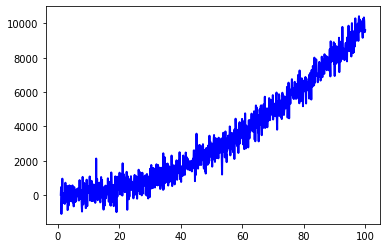

In [32]:
mu, sigma = 0, 500

x = np.arange(1, 100, 0.1)  # x axis
z = np.random.normal(mu, sigma, len(x))  # noise
y = x ** 2 + z # data
plt.plot(x, y, linewidth=2, linestyle="-", c="b")

## 3.1 

In [33]:
sampleRate = 100
x_data =y 

## 4. 저역통과필터 (Low Pass Filter)
- 출처 : https://pinkwink.kr/742
- https://coding-yoon.tistory.com/23

## 4.1  scipy firwin, lfilter 사용 

In [37]:
b = signal.firwin(100,cutoff = 20, fs = sampleRate, pass_zero = "lowpass")
x1 = signal.lfilter(b,[1.0],x)

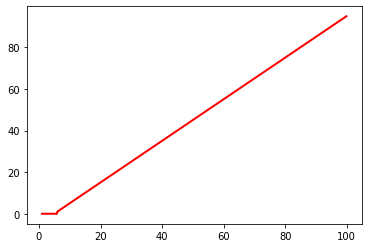

In [35]:
plt.plot(x, x1, linewidth=2, linestyle="-", c="r")

In [13]:
print(y[0])

551.641359290268


## 4.2 

In [20]:
ts = 0.0001
tau = 0.1

tmpResult = []
tmpResult.append(y[0])
for i in np.arange(1,len(x)):
    tmpResult.append( (tau * tmpResult[i-1] + ts * y[i] ) / (ts + tau))
    #print(tmpResult[i])

550.6862629979004
550.2621961358583
549.7928525361743
549.5738621369144
549.2205831094842
548.8232281375356
548.1309885683602
547.6951565572517
546.9533299310721
546.5674128150168
546.4894315385468
546.8420560473411
545.2065764757753
544.3723151001168
543.4463264413193
542.850427279094
543.4222166219795
543.1802072964181
543.8260882387469
544.691986860213
543.4632175246808
542.72516034755
542.0443961706733
541.8259577345792
541.1517832603647
539.6092634952606
539.7176961947978
539.0469438952252
538.5791540408222
537.9679805249459
537.0121848064496
535.8115894802726
535.7647877100964
535.3215926330497
534.1190077286658
533.8228454796011
533.9148269553041
532.4332176216996
531.547386465678
531.3985670381616
531.268098611856
530.5531305857004
529.8216312847527
529.6305725476344
529.3865108178114
529.3726901176834
529.2379441800385
529.0308994969917
528.9826287955465
527.4600366335385
526.1768938059254
525.1244512351241
525.6265591469436
525.072802799906
523.8912618921008
524.0941001153114

In [21]:
y_ = tmpResult

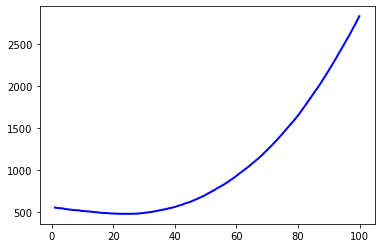

In [22]:
plt.plot(x, y_, linewidth=2, linestyle="-", c="b")

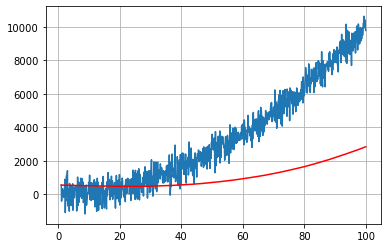

In [23]:
plt.plot(x,y,x,y_,'r')
plt.grid(True)
plt.show()